## Introduction
In this exercise, you will implement linear regression and get to see it work on data.
### Linear regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering diﬀerent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.
You would like to use this data to help you select which city to expand
to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a
loss. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ex1data="6.1101,17.592;5.5277,9.1302;8.5186,13.662;7.0032,11.854;5.8598,6.8233;8.3829,11.886;7.4764,4.3483;8.5781,12;6.4862,6.5987;5.0546,3.8166;5.7107,3.2522;14.164,15.505;5.734,3.1551;8.4084,7.2258;5.6407,0.71618;5.3794,3.5129;6.3654,5.3048;5.1301,0.56077;6.4296,3.6518;7.0708,5.3893;6.1891,3.1386;20.27,21.767;5.4901,4.263;6.3261,5.1875;5.5649,3.0825;18.945,22.638;12.828,13.501;10.957,7.0467;13.176,14.692;22.203,24.147;5.2524,-1.22;6.5894,5.9966;9.2482,12.134;5.8918,1.8495;8.2111,6.5426;7.9334,4.5623;8.0959,4.1164;5.6063,3.3928;12.836,10.117;6.3534,5.4974;5.4069,0.55657;6.8825,3.9115;11.708,5.3854;5.7737,2.4406;7.8247,6.7318;7.0931,1.0463;5.0702,5.1337;5.8014,1.844;11.7,8.0043;5.5416,1.0179;7.5402,6.7504;5.3077,1.8396;7.4239,4.2885;7.6031,4.9981;6.3328,1.4233;6.3589,-1.4211;6.2742,2.4756;5.6397,4.6042;9.3102,3.9624;9.4536,5.4141;8.8254,5.1694;5.1793,-0.74279;21.279,17.929;14.908,12.054;18.959,17.054;7.2182,4.8852;8.2951,5.7442;10.236,7.7754;5.4994,1.0173;20.341,20.992;10.136,6.6799;7.3345,4.0259;6.0062,1.2784;7.2259,3.3411;5.0269,-2.6807;6.5479,0.29678;7.5386,3.8845;5.0365,5.7014;10.274,6.7526;5.1077,2.0576;5.7292,0.47953;5.1884,0.20421;6.3557,0.67861;9.7687,7.5435;6.5159,5.3436;8.5172,4.2415;9.1802,6.7981;6.002,0.92695;5.5204,0.152;5.0594,2.8214;5.7077,1.8451;7.6366,4.2959;5.8707,7.2029;5.3054,1.9869;8.2934,0.14454;13.394,9.0551;5.4369,0.61705"

In [3]:
data = np.mat(ex1data)
data[0:5]

matrix([[ 6.1101, 17.592 ],
        [ 5.5277,  9.1302],
        [ 8.5186, 13.662 ],
        [ 7.0032, 11.854 ],
        [ 5.8598,  6.8233]])

In [4]:
# x refers to the population size in 10,000s
# y refers to the profit in $10,000s
X = np.array(data[:, 0]).flatten()
y = np.array(data[:, 1]).flatten()
print(X[0:5])
print(y[0:5])

[6.1101 5.5277 8.5186 7.0032 5.8598]
[17.592   9.1302 13.662  11.854   6.8233]


## Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)

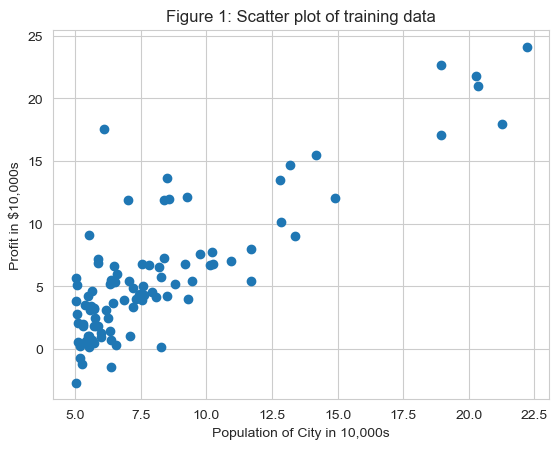

In [5]:
def plotData(X, y, theta=None):
    plt.scatter(X, y)
    if theta is not None:
        plt.plot(X, hypothesis(X, theta), color='red')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Figure 1: Scatter plot of training data')
    plt.show()
plotData(X, y)

## Gradient Descent
In this section, you will fit the linear regression parameters $\theta$ to our dataset using **gradient descent**.

#### Update Equations
The objective of linear regression is to minimize the cost function:
$$
    J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
$$
where the hypothesis $\( h_\theta(x) \)$ is defined by the linear model:
$$
    h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Recall that the parameters of your model are the $ \theta_j $ values. These are the values you will adjust in order to minimize the cost function $ J(\theta) $. One common method to perform this optimization is the **batch gradient descent algorithm**.

In batch gradient descent, the parameters are updated as follows for each iteration:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

where:

- $\( \alpha \)$ is the **learning rate**
- $\( m \)$ is the number of training examples
- $\( h_{\theta}(x^{(i)}) \)$ is the predicted value for the $\( i \)$-th training example
- $\( y^{(i)} \)$ is the actual target output for the $\( i \)$-th training example
- $\( x_j^{(i)} \)$ denotes the feature $\( j \)$ of the $\( i \)$-th training example

The iteration performs these updates for all $\( \theta_j \)$ (for $\( j = 0, 1, \ldots, n \))$ simultaneously in each step until convergence.

In [6]:
theta_0 = np.array([0., 0.])
theta_1 = np.array([1., 1.])

In [7]:
def hypothesis(X, theta):
    ones = np.ones(len(X))
    X_padded = np.vstack((ones, X))
    return theta.dot(X_padded)
hypothesis(X, theta_1)

array([ 7.1101,  6.5277,  9.5186,  8.0032,  6.8598,  9.3829,  8.4764,
        9.5781,  7.4862,  6.0546,  6.7107, 15.164 ,  6.734 ,  9.4084,
        6.6407,  6.3794,  7.3654,  6.1301,  7.4296,  8.0708,  7.1891,
       21.27  ,  6.4901,  7.3261,  6.5649, 19.945 , 13.828 , 11.957 ,
       14.176 , 23.203 ,  6.2524,  7.5894, 10.2482,  6.8918,  9.2111,
        8.9334,  9.0959,  6.6063, 13.836 ,  7.3534,  6.4069,  7.8825,
       12.708 ,  6.7737,  8.8247,  8.0931,  6.0702,  6.8014, 12.7   ,
        6.5416,  8.5402,  6.3077,  8.4239,  8.6031,  7.3328,  7.3589,
        7.2742,  6.6397, 10.3102, 10.4536,  9.8254,  6.1793, 22.279 ,
       15.908 , 19.959 ,  8.2182,  9.2951, 11.236 ,  6.4994, 21.341 ,
       11.136 ,  8.3345,  7.0062,  8.2259,  6.0269,  7.5479,  8.5386,
        6.0365, 11.274 ,  6.1077,  6.7292,  6.1884,  7.3557, 10.7687,
        7.5159,  9.5172, 10.1802,  7.002 ,  6.5204,  6.0594,  6.7077,
        8.6366,  6.8707,  6.3054,  9.2934, 14.394 ,  6.4369])

In [8]:
def J(X, y, theta):
    m = len(y)
    return np.sum(np.square(hypothesis(X, theta) - y)) / (2*m)
J(X, y, theta_0)

32.072733877455676

### Gradient descent
Next, you will implement gradient descent.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

What you are trying to optimize and what is being updated. Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ)
by changing the values of the vector θ, not by changing X or y. Refer to the
equations in this handout and to the video lectures if you are uncertain.
A good way to verify that gradient descent is working correctly is to look
at the value of J(θ) and check that it is decreasing with each step. 
The
starter code for gradientDescent.m calls computeCost on every iteration
and prints the cost. Assuming you have implemented gradient descent and
computeCost correctly, your value of J(θ) should never increase, and should
converge to a steady value by the end of the algorithm.

In [9]:
def grad(X, y, theta):
    m = len(y)
    grads = (hypothesis(X, theta) - y)*X
    return np.sum(grads)/m
grad(X, y, theta_0)

-65.32884974555671

In [10]:
def grad_descent(X, y, theta_0=np.array([0.0, 0.0]), learning_rate=0.01, iterations=1500):
    thetas = [theta_0.copy()]
    Js = [J(X, y, theta_0)]
    for i in range(iterations):
        gradient = grad(X, y, theta_0) # Compute the gradient for all parameters at once
        theta_0 -= learning_rate * gradient # Update all parameters at once
        thetas.append(theta_0.copy())
        Js.append(J(X, y, theta_0))
            
    print(f"J: {J(X, y, theta_0):.4f}")
    print(f"theta: {theta_0}")
    result = {'theta': theta_0, 'thetas': thetas, 'costs':Js}
    return result

In [11]:
theta = grad_descent(X, y)['theta']
theta

J: 6.4245
theta: [0.72941179 0.72941179]


array([0.72941179, 0.72941179])

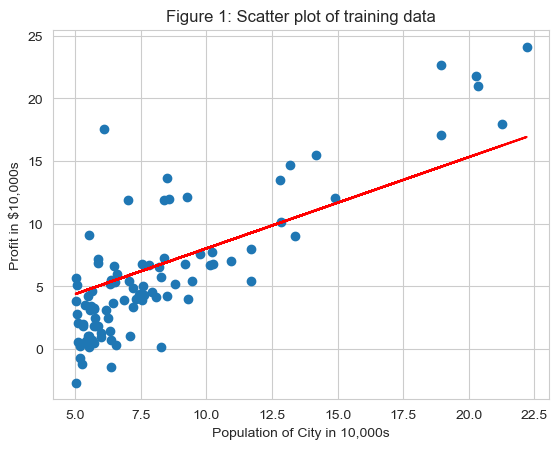

In [12]:
plotData(X, y, theta)

## Visualizing J(θ)
To understand the cost function J(θ) better, you will now plot the cost over
a 2-dimensional grid of θ0 and θ1 values. 

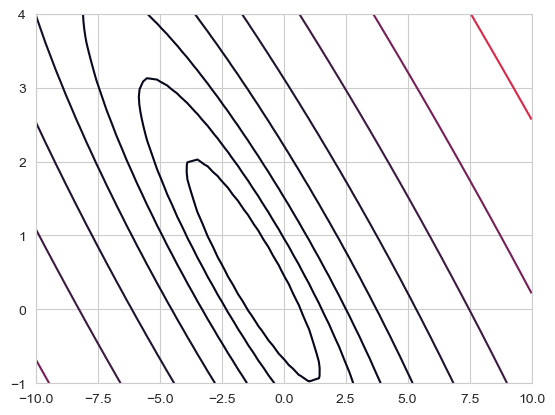

In [13]:
theta0 = np.linspace(-10, 10)
theta1 = np.linspace(-1, 4)
J_vals = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        J_vals[i, j] = J(X, y, np.array([theta0[i], theta1[j]]))

plt.contour(theta0, theta1, J_vals, levels=np.logspace(-2, 3, 20))

## Using SK Learn library to do same linear regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()

# Train the model
X_T = X.reshape(-1, 1)
model.fit(X_T, y)
# Make predictions
y_pred = model.predict(X_T)

# Evaluate the model
mse = mean_squared_error(y, y)
r2 = r2_score(y, y)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# cost of sklearn model is better than of the above algorithm
J(X, y, np.array(np.hstack((model.intercept_, model.coef_))))

Mean Squared Error: 0.0
R^2 Score: 1.0
Intercept: -3.8957808783118537
Coefficients: [1.19303364]


4.476971375975178